In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift, KMeans
import matplotlib.pyplot as plt

C:\Users\d.v.kulemin.UTMN\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
%matplotlib inline

In [3]:
with open('checkins.dat') as dat_file, open('checkins.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    for line in dat_file:
        row = [field.strip() for field in line.split('|')]
        if len(row) == 6:
            csv_writer.writerow(row)

In [4]:
data = pd.read_csv('checkins.csv')
data = data.dropna()
data.created_at = data.created_at.apply(pd.to_datetime)
data.head()

,id,user_id,venue_id,latitude,longitude,created_at
1,984222,15824,5222,38.895112,-77.036366,2012-04-21 17:43:47
3,984234,44652,5222,33.800745,-84.410520,2012-04-21 17:43:43
7,984291,105054,5222,45.523452,-122.676207,2012-04-21 17:39:22
9,984318,2146539,5222,40.764462,-111.904565,2012-04-21 17:35:46
10,984232,93870,380645,33.448377,-112.074037,2012-04-21 17:38:18


In [5]:
coordinates = data.iloc[:100000, 3:5]

In [6]:
coordinates.head()

,latitude,longitude
1,38.895112,-77.036366
3,33.800745,-84.410520
7,45.523452,-122.676207
9,40.764462,-111.904565
10,33.448377,-112.074037


In [7]:
model = MeanShift(bandwidth=0.1)
preds = model.fit_predict(coordinates)

In [8]:
np.random.seed(4)
cmap = [np.hstack((np.random.rand(3,))) for _ in range(len(set(preds)))]

In [9]:
with open('world.jpg', 'rb') as fmap:
    map_img = plt.imread(fmap)

In [10]:
x = np.array(coordinates.iloc[:, 1])
y = np.array(coordinates.iloc[:, 0])

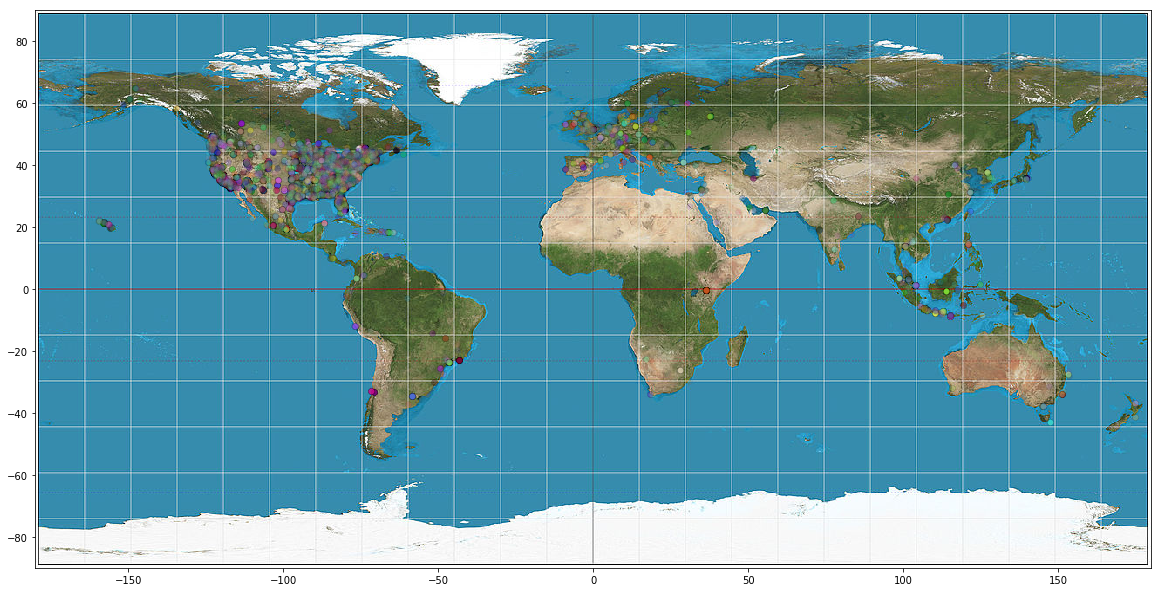

In [23]:
plt.figure(figsize=(20, 11))
plt.imshow(map_img, extent = [-180, 180, -90, 90])
for cluster in range(len(set(preds))):
    one_cluster = np.nonzero(preds == cluster)[0]
    plt.scatter(coordinates.iloc[(one_cluster, 1)], coordinates.iloc[(one_cluster, 0)], 
                color = cmap[cluster],  alpha=0.1, edgecolor = 'black', lw = 0.2)
plt.show()

In [12]:
clusters = coordinates
clusters['cluster'] = preds

In [13]:
clusters_over_15 = pd.DataFrame(columns=['latitude', 'longitude', 'cluster'])
for i in set(preds):
    if clusters[clusters.cluster == i].cluster.count() > 15:
        clusters_over_15 = clusters_over_15.append(clusters[clusters.cluster == i])

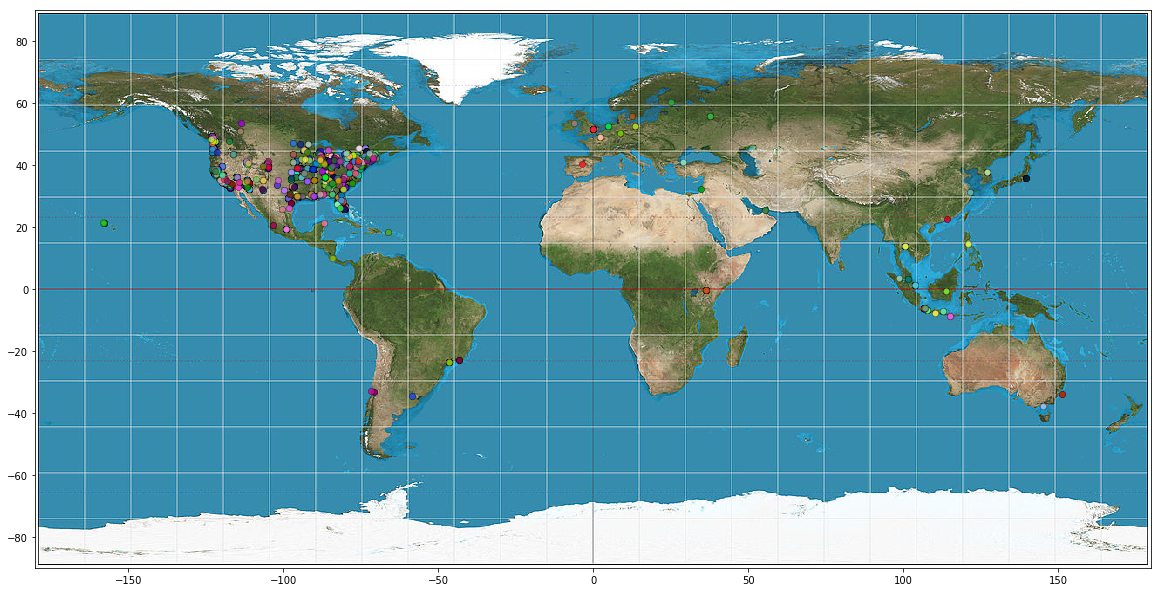

In [22]:
x = np.array(clusters_over_15.iloc[:, 0])
y = np.array(clusters_over_15.iloc[:, 1])

plt.figure(figsize=(20, 11))
plt.imshow(map_img, extent = [-180, 180, -90, 90])
for cluster in range(len(set(clusters_over_15.cluster))):
    one_cluster = np.nonzero(np.array(clusters_over_15.cluster) == cluster)[0]
    plt.scatter(clusters_over_15.iloc[(one_cluster, 1)], clusters_over_15.iloc[(one_cluster, 0)],
                color = cmap[cluster], alpha=0.1, edgecolor = 'black', lw = 0.2)
plt.show()

In [15]:
means = []
for i in set(clusters_over_15.cluster):
    means.append([clusters_over_15[clusters_over_15.cluster == i].mean().latitude, 
                 clusters_over_15[clusters_over_15.cluster == i].mean().longitude])

In [16]:
with open('bulk_entry.txt', 'w') as fout:
    for i in means:
        print(f'{i[0]}, {i[1]}', file=fout)

In [24]:
coord = np.array([[33.751277, -118.188740],[25.867736, -80.324116], 
                 [51.503016, -0.075479], [52.378894, 4.885084], 
                 [39.366487, 117.036146],[-33.868457, 151.205134]])

In [18]:
with open('bulk_entry2.txt', 'w') as fout:
    for i in coord:
        print(f'{i[0]}, {i[1]} <blue>', file=fout)

In [19]:
distances = []
for i in means:
    tmp_list = []
    for j in coord:
        tmp_list.append(np.linalg.norm(j - i))
    distances.append(np.min(tmp_list))

In [20]:
distances_20_coord = sorted(list(zip(distances, means)))[:20]

In [21]:
with open('bulk_entry1.txt', 'w') as fout:
    for count, i in enumerate(distances_20_coord):
        print('{0}, {1} {2} <green>'.format(i[1][0], i[1][1], '{'+str(count)+'}'), file=fout)